# Práctica 2 - Aplicación de filtros a imágenes por convolución

<table>
<td>

| **Autores** |
|:------------------------:|
||
| Manuel Benítez Gutierrez |
| Alonso Moreno Gil |
| Cristian Sevilla Díaz |

</td>
<td>
<table>
  <tr>
    <th>Universidad Francisco de  Vitoria</th>
  </tr>
  <tr>
    <th>Facultad Politécnica</th>
  </tr>
  <tr>
    <th>Computación de Alto Rendimiento</th>
  </tr>
</table>
</td>
</table>

## Datos de la práctica

### _Objetivo de la Práctica_

1. Realización de operación de filtro a elegir por el grupo de alumnos
1. La programación se realizará en 2 versiones:
  1. Algoritmo serial
  1. Algoritmo paralelo (Numba CUDA)
1. Puesto que la programación se realizará utilizando el lenguaje Python, se recurrirá al uso de alguna librería disponible para la apertura de ficheros de imágenes, así como su salvaguarda
1. Se utilizarán un conjunto de imágenes de origen con diferentes dimensiones (ejemplo: 10x10, 50x50, 100x100, 500x500, 1000x1000, etc.) hasta un peso lo suficientemente grande como para resaltar con cambios de comportamiento entre las dos versiones del algoritmo y tomar conclusiones. La imagen puede ser la misma aplicando previamente un redinsonamiento manual a varias medidas con las que se vaya a trabajar. Para ello se podrá utilizar un editor de imágenes, por ejemplo.
1. En la versión paralela del algoritmo, también se dejará parametrizada la opción del número de GPUs a disposición del reparto y cómputo, de modo que, durante la fase de pruebas y mediciones de rendimiento, se juegue con las dos dimensiones del número de GPUs y tamaño de la imágen.

### _Utilidades_

<table>
  <tr>
    <th>
    Librería
    </th>
    <th>
    Funcionalidad
    </th>
  </tr>
  <tr>
    <td>
    Numba CUDA
    </td>
    <td>
    Rendimiento y Paralelización
    </td>
  </tr>
  <tr>
    <td>
    Pillow
    </td>
    <td>
    Procesamiento de Imágenes
    </td>
  </tr>
  <tr>
    <td>
    Numpy
    </td>
    <td>
    Librería Numérica
    </td>
  </tr>
  <tr>
    <td>
    Request
    </td>
    <td>
    Referencias por enlace
    </td>
  </tr>
  <tr>
    <td>
    time
    </td>
    <td>
    Tiempos de Ejecución
    </td>
  </tr>
  <tr>
    <td>
    Matplotlib
    </td>
    <td>
    Librería Gráfica
    </td>
  </tr>
</table>

### _Convolución_

La función de una convolución es realizar el filtrado de los píxeles de una imagen, dependiendo del kernel o núcleo que se use, se puede transformar la imagen de distintas formas. Los kernels representan la parte de los valores de píxeles circundantes que se debe tomar en cuenta para el cálculo del valor de intensidad del píxel actual.

A nivel práctico, esto significa que si contamos con una imagen de 𝐌𝗑𝐍, y un kernel de 𝐦𝗑𝐧 , entonces la matriz resultante que obtendremos tendrá 𝐌-𝐦+1 filas y 𝐍-𝐧+1 columnas.

<br>

$$
\begin{bmatrix} \color{yellow}{0} & \color{yellow}{0} & \color{yellow}{0} & 0 & 0 & 0 \\\ \color{yellow}{0} & \color{yellow}{0} & \color{yellow}{0} & 0 & 0 & 0 \\\ \color{yellow}{0} & \color{yellow}{0} & \color{yellow}{0} & 0 & 0 & 0 \\\ 0 & 0 & 0 & 0 & 0 & 0 \\\ 0 & 0 & 0 & 0 & 0 & 0 \\\ 0 & 0 & 0 & 0 & 0 & 0 \end{bmatrix}
\times
\begin{bmatrix} 0 & 0 & 0 \\\ -1 & 1 & 0 \\\ 0 & 0 & 0 \end{bmatrix}
=
\begin{bmatrix} \color{blue}{0} & 0 & 0 & 0 \\\ 0 & 0 & 0 & 0 \\\ 0 & 0 & 0 & 0 \\\ 0 & 0 & 0 & 0 \end{bmatrix}
$$

<br>

### _Filtros Implementados_

<table>
  <tr>
    <th>
    Filtro Box Blur
    </th>
    <th>
    Filtro Sharpen
    </th>
    <th>
    Filtro Ridge
    </th>
    <th>
    Filtro Gaussian Blur
    </th>
    <th>
    Filtro Border Sharpen
    </th>
    <th>
    Filtro Simple Blur
    </th>
  </tr>
  <tr>
    <td>
    \begin{pmatrix}\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\\ \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\\ \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \end{pmatrix}
    </td>
    <td>
    \begin{pmatrix} 0 & -1 & 0 \\\ -1 & 5 & -1 \\\ 0 & -1 & 0 \end{pmatrix}
    </td>
    <td>
    \begin{pmatrix} 0 & 1 & 0 \\\ 1 & -4 & 1 \\\ 0 & 1 & 0 \end{pmatrix}
    </td>
    <td>
    \begin{pmatrix} \frac{1}{16} & \frac{2}{16} & \frac{1}{16} \\\ \frac{2}{16} & \frac{4}{16} & \frac{2}{16} \\\ \frac{1}{16} & \frac{2}{16} & \frac{1}{16}  \end{pmatrix}
    </td>
    <td>
    \begin{pmatrix} 0 & 0 & 0 \\\ -1 & 1 & 0 \\\ 0 & 0 & 0 \end{pmatrix}
    </td>
    <td>
    \begin{pmatrix}\frac{1}{25} & \frac{1}{25} & \frac{1}{25} \\\ \frac{1}{25} & \frac{1}{25} & \frac{1}{25} \\\ \frac{1}{25} & \frac{1}{25} & \frac{1}{25} \end{pmatrix}
    </td>
  </tr>
</table>
<br>







## Importamos Librerías

In [ ]:
import sys
import time

# Librerías para Computación de Alto Rendimiento
import numba
from numba import cuda, jit

# Librerías de Procesamiento de Imágenes
import PIL
from PIL import Image
import requests # Para leer URLs

# Calcular tiempo de ejecución
from time import perf_counter

# Librería Numérica
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

# Librería Gráfica
import matplotlib.pyplot as plt
import pylab
from matplotlib import cm

%matplotlib inline

# Mostramos las versiones utilizadas de las librerías
print(f"Numpy: {np.__version__}")
print(f"Numba: {numba.__version__}")
print(f"Pillow: {PIL.__version__}")
print(f"Request: {requests.__version__}")
cuda.detect()

Numpy: 1.21.6
Numba: 0.56.4
Pillow: 7.1.2
Request: 2.23.0
Found 1 CUDA devices
id 0             b'Tesla T4'                              [SUPPORTED]
                      Compute Capability: 7.5
                           PCI Device ID: 4
                              PCI Bus ID: 0
                                    UUID: GPU-f557c710-9cd1-2632-bb97-829af141f56f
                                Watchdog: Disabled
             FP32/FP64 Performance Ratio: 32
Summary:
	1/1 devices are supported


True

## Características del Sistema

En esta sección encontraremos todos los datos necesarios para configurar adecuadamente el algoritmo paralelo

In [ ]:
gpu = cuda.get_current_device()

MAX_THREADS_PER_BLOCK = gpu.MAX_THREADS_PER_BLOCK
MAX_BLOCK_DIM_X = gpu.MAX_BLOCK_DIM_X
MAX_GRID_DIM_X = gpu.MAX_GRID_DIM_X
SMs = gpu.MULTIPROCESSOR_COUNT
PCI_BUS = gpu.PCI_BUS_ID
PCI_DEV = gpu.PCI_DEVICE_ID

print(f"Nombre: {gpu}")
print("===============================================")
print(f"Multiprocesadores Máximos:   {SMs:10}")
print(f"Máximos hilos por bloque: {MAX_THREADS_PER_BLOCK:13}")
print(f"Máximos bloques por grid:   {MAX_BLOCK_DIM_X:11}")
print(f"Máximos hilos por grid:  {MAX_GRID_DIM_X:14}")
print(f"PCI Bus:  {PCI_BUS:29}")
print(f"PCI Device:  {PCI_DEV:26}")

Nombre: <CUDA device 0 'b'Tesla T4''>
Multiprocesadores Máximos:           40
Máximos hilos por bloque:          1024
Máximos bloques por grid:          1024
Máximos hilos por grid:      2147483647
PCI Bus:                              0
PCI Device:                           4


## Configuración inicial

#### _Cargar Imágen Inicial_

Funciones de procesamiento de imágen:
1. loadImg(url)
> Esta función toma la url de una imágen y devuelve la imágen asociada a la misma como una imágen de **PILLOW**
1. changeSize(img, x, y)
> Esta función toma la imágen y devuelve una copia de la misma con las dimensiones dadas en (x, y). Esta función mantiene el _aspect ratio_ de la imágen pero solo puede mantener o reducir el tamaño inicial.
1. changeSizeAbsolute(img, x, y)
> Esta función toma la imágen y devuelve una copia de la misma con las dimensiones dadas en (x, y). Esta función no mantiene el _aspect ratio_ de la imágen pero puede aumentar y reducir el tamaño de la imágen.

#### _Preparar entorno_

Tenemos diferentes variables para preparar la ejecución más adelante en función a sus valores:
+ Seleccionar la url **(string)**
+ Elegir el número de imágenes a generar **(integer)**
+ Mostrar las imágenes generadas **(booleano)**
+ Mostrar las imágenes en la convolución lineal **(booleano)**
+ Wake up gpu **(booleano)**:
> Hemos observado un comportamiento con la gpu que provoca que la primera vez que se ejecuta una función de cualquier tipo en la gpu de _Google Colab_, aunque no se hagan operaciones de ningún tipo dentro de la misma, la gpu tarda en finalizar la función > 0.25 segundos; aunque el tiempo de ejecución de la función sea mínimo (ms o ns).
>
> Podemos comprobar, con más ejecuciones, que después de esta se devolverán valores de tiempo de varias magnitudes menores. En nuestro caso con la imagen seleccionada a tamaño máximo estamos viendo que esta primera ejecución sin cálculos tarda > 0.25s y la segunda ejecución con cálculos de convolución se encuentra en los 0.0003s aproximadamente.

Dimensiones de la imágen original: 2400 x 1350



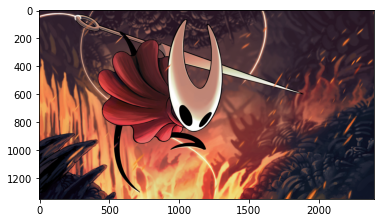

In [ ]:
# Devuelve la imagen asociada a la url
def loadImg(url):
  return Image.open(requests.get(url, stream=True).raw)

# Cambia a un tamaño menor manteniendo el ratio
def changeSize(img, x, y):
  image = img.copy()
  image.thumbnail( (x,y) )
  return image

# Cambia el tamaño sin mantener el ratio (Puede aumentar el tamaño)
def changeSizeAbsolute(img, x, y):
  image = img.copy()
  image = image.resize( (x,y) )
  return image


url = 'https://images.igdb.com/igdb/image/upload/t_original/ar5sq.jpg' # Recomendada
url_2 = 'https://upload.wikimedia.org/wikipedia/commons/5/50/Vd-Orig.png'
url_3 = 'https://www.65ymas.com/uploads/s1/48/58/05/hamburguesa-2_1_621x621.jpeg'

numero_de_imagenes_a_generar = 10  # Número de imagenes que se rescalaran de la original para distintas comparaciones tiempo/tamaño
mostrar_imagenes_generacion = 1   # 0 o 1, si se quiere o no que que se vayan mostrando las imagenes según se van reescalando
mostrar_imagenes_convolucion = 1  # 0 o 1, si se quiere o no que que se vayan mostrando las imagenes según se va realizando la convolución
wake_up_gpu = 1   # Si esta variable (wake_up_gpu == 1) se "despertará" la gpu con una función sin calculos y solo despues se ejecutará con calculos,
                  # para ver solo cuanto tardan las operaciones dentro de la gpu, por el contrario si esta variable (wake_up_gpu == 0) no se hará
                  # hará esto y se ejecutará directamente la función completa

im = loadImg(url) # Se carga la imagen desde la URL

# Se imprime la imagen original con su tamaño
print(f"Dimensiones de la imágen original: {im.size[0]} x {im.size[1]}\n")
plt.imshow(im)
imArr = np.asarray(im)

#### _Generación de Imágenes a Partir de la Original_

A partir de esta función generamos una lista de imágenes de tamaño creciente en función al número que se nos pidan hasta llegar al tamaño de la imágen original.

Se mostrarán todas estas imágenes en un grid bidimensional (siempre y cuando la correspondiente opción haya sido seleccionada).

In [ ]:
def generar_imagenes(imagen, img_size, num_img_generar):
  x = np.round(np.linspace(0, img_size[0], num_img_generar+1, endpoint=True))[1:] # Se divide una de las dimensiones de la imagen
  print("Iniciando generacion de imagenes. \n")
  if (mostrar_imagenes_generacion == 1):
    fig, axes = plt.subplots(int(np.ceil(num_img_generar/2)), int(2), figsize=(12,14))
  img_gen_list = [] # Creamos una lista para guardar las imagenes
  for i in range(len(x)):
    if (x[i] != img_size[1]): # Mientras el tamaño de la imagen sea distinto que el de la original, se generará, como la última siempre será la original se copiará
      img_gen_list.append(changeSize(imagen, x[i], img_size[0])) # Llamamos a la funcion de resize y se la pasa la imagen, la dimension modificada y la dimension y original para que la ignore manteniendo el ratio de aspecto segun el diseño de la función
    else:
      img_gen_list.append(imagen) # Copiamos la img original si hemos llegado al final
    if (mostrar_imagenes_generacion == 1): # Si en la declaración de variables de decide mostrar las imagenes según se van generando
      axes[int(i%(num_img_generar/2)),int(np.floor(i/(num_img_generar/2)))].imshow(img_gen_list[i])
      axes[int(i%(num_img_generar/2)),int(np.floor(i/(num_img_generar/2)))].title.set_text("Imagen "+ str(i+1) + ": " + str(img_gen_list[i].size[0]) + " x " + str(img_gen_list[i].size[1]))
    else:
      print("Imagen " + str(i+1) + " de " + str(num_img_generar) + ", tamaño: " + str(img_gen_list[i].size) + " (ancho, alto).\n") # Printeo del progresos
  if (mostrar_imagenes_generacion == 1):
     fig.tight_layout()
     plt.show()
  print("\n")
  return img_gen_list


#### _Algoritmos Secuenciales_

Algoritmos de convolución secuencial sin y con jit, respectivamente.

Ambos algoritmos operan viajando la matriz tridimensional (debido a que operamos con RGB sin dividir la matriz) y calculando cada pixel con el kernel, color a color.

Contamos con un control de errores que nos permite mantener los números en un rango entre 0 y 255.

In [ ]:
# Algoritmo secuencial de convolución de imágenes

def convolucion_imagen_RGB(imagen, T_imagen, kernel, T_kernel, img_fin, img_fin_size):
  # Se recorren las tres dimensiones de la imagen
  for i in range(img_fin_size[0]): # Ancho
    for j in range(img_fin_size[1]): # Alto
      for k in range(3): # RGB
        # Se multiplica el fragmento de pixeles por el kernel y se realiza el sumatorio de los elementos resultantes
        temp = np.sum(np.multiply(kernel, imagen[i:i+kernel.shape[0], j:j+kernel.shape[1], k] ))
        # Se controlan errores que puedan haber como exceder los valores del RGB
        if temp > 255:
          img_fin[i, j, k] = 255
        elif temp < 0:
          img_fin[i, j, k] = 0
        else:
          img_fin[i, j, k] = temp

  return img_fin

# Ambos algoritmos son identicos salvo por que, en este caso, se usará jit
@jit(nopython=True)
def convolucion_imagen_RGB_jit(imagen, T_imagen, kernel, T_kernel, img_fin, img_fin_size):
  # Se recorren las tres dimensiones de la imagen
  for i in range(img_fin_size[0]): # Ancho
    for j in range(img_fin_size[1]): # Alto
      for k in range(3): # RGB
      # Se multiplica el fragmento de pixeles por el kernel y se realiza el sumatorio de los elementos resultantes
        temp = np.sum(np.multiply(kernel, imagen[i:i+kernel.shape[0], j:j+kernel.shape[1], k] ))
        # Se controlan errores que puedan haber como exceder los valores del RGB
        if temp > 255:
          img_fin[i, j, k] = 255
        elif temp < 0:
          img_fin[i, j, k] = 0
        else:
          img_fin[i, j, k] = temp

  return img_fin

#### _Configuración de Filtros_

Aquí tenemos todos los filtros implementados en la práctica. La variable **kernel** será la que determine el filtro a usar (puede ser de 3x3 o 5x5).

In [ ]:
blur_s = np.array( [[1/9,1/9,1/9],
                    [1/9,1/9,1/9],
                    [1/9,1/9,1/9]] )

sharpen = np.array( [[0,-1,0],
                    [-1,5,-1],
                    [0,-1,0]] )

blur = np.array([
    [1/25, 1/25, 1/25, 1/25, 1/25],
    [1/25, 1/25, 1/25, 1/25, 1/25],
    [1/25, 1/25, 1/25, 1/25, 1/25],
    [1/25, 1/25, 1/25, 1/25, 1/25],
    [1/25, 1/25, 1/25, 1/25, 1/25]  ])

ridge = np.array([
    [0, 1,0],
    [1, -4, 1],
    [0, 1, 0] ])

realce_bordes = np.array([
    [0, 0, 0],
    [-1, 1, 0],
    [0, 0, 0] ])

gausian_blurr = np.array( [[1/16,2/16,1/16],
                           [2/16,4/16,2/16],
                           [1/16,2/16,1/16]] )

kernel = ridge # El kernel que se va a usar
ker_size = kernel.shape # Sacamos las dimensiones del kernel

#### _Resultados de los Algoritmos Secuenciales_

Ejecutamos los algoritmos secuenciales y comprobamos la diferencia en los tiempos de ejecución.

Viajamos el array que tiene todas las imágenes y vamos almacenando los resultados en 2 figuras (para el secuencial con y sin jit).

Iniciando generacion de imagenes. 



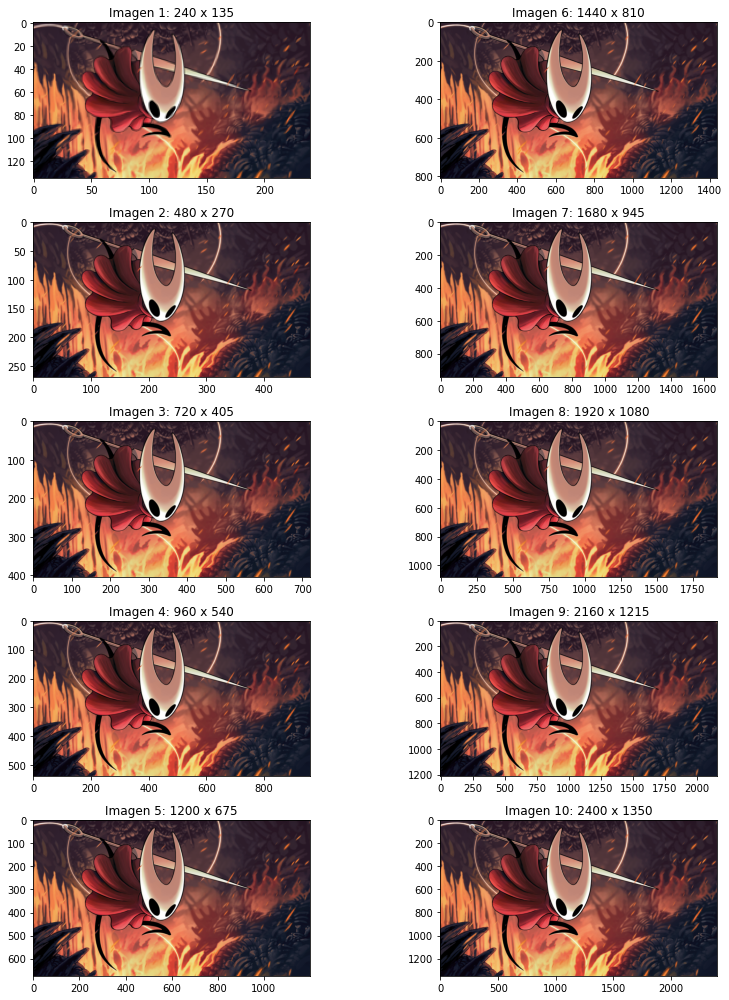



Iniciando la convolucion de las imagenes.


Imagen 1 de 10, tamaño: (240, 135) (ancho, alto).
	Tiempo de ejecución sin jit: 0.5945807729999899 segundos.
	Tiempo de ejecución con jit: 0.8866723229999991 segundos.

		0.67058 veces mas rapido con jit.



Imagen 2 de 10, tamaño: (480, 270) (ancho, alto).
	Tiempo de ejecución sin jit: 2.3983215370000153 segundos.
	Tiempo de ejecución con jit: 0.04816285500001527 segundos.

		49.79608 veces mas rapido con jit.



Imagen 3 de 10, tamaño: (720, 405) (ancho, alto).
	Tiempo de ejecución sin jit: 5.330815510999997 segundos.
	Tiempo de ejecución con jit: 0.0934301620000042 segundos.

		57.05669 veces mas rapido con jit.



Imagen 4 de 10, tamaño: (960, 540) (ancho, alto).
	Tiempo de ejecución sin jit: 9.581568239999996 segundos.
	Tiempo de ejecución con jit: 0.165929742000003 segundos.

		57.74473 veces mas rapido con jit.



Imagen 5 de 10, tamaño: (1200, 675) (ancho, alto).
	Tiempo de ejecución sin jit: 14.87341816899999 segundos.
	Tiempo de e

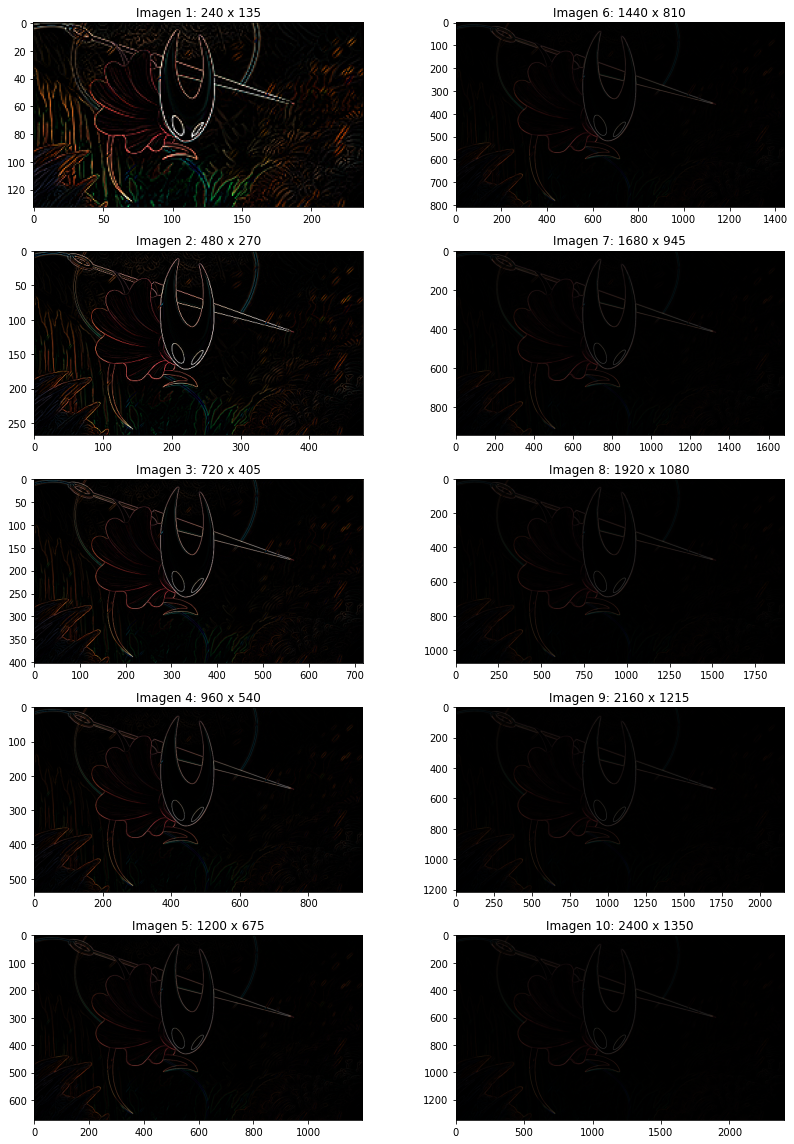

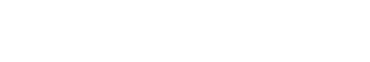

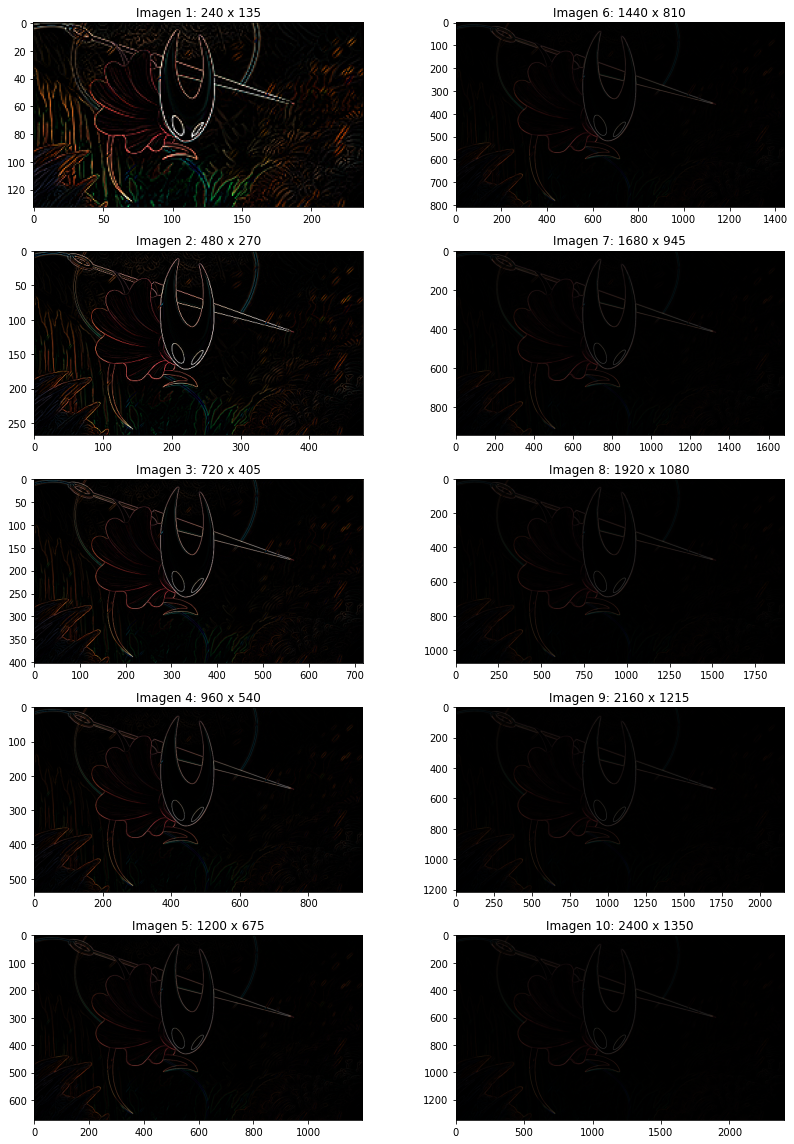

In [ ]:
# Generamos varias imágenes a partir de la original y las almacenamos en una lista
img_size = im.size
img_list = generar_imagenes(im, img_size, numero_de_imagenes_a_generar)

# Arrays vacios para almacenar los tiempos de ejecución
T_sin_jit = []
T_con_jit = []

len_img_list = len(img_list)

print("Iniciando la convolucion de las imagenes.\n\n")

if(mostrar_imagenes_convolucion == 1):
  fig_c, axes_c = plt.subplots(int(np.ceil(numero_de_imagenes_a_generar/2)), int(2), figsize=(12,16))
  # Separador
  f,ax = plt.subplots()
  f.set_visible(False)
  f.set_figheight(0.5)
  # Fin Separador
  fig_j, axes_j = plt.subplots(int(np.ceil(numero_de_imagenes_a_generar/2)), int(2), figsize=(12,16))

# Realizamos la convolución con cada una de las imágenes de la lista
for i in range(len_img_list):
  img_ac = np.array(img_list[i])
  img_ac_shape = img_ac.shape

  # Definimos las dimensiones que va a atener la matriz donde vamos a guardar la imagen ya tratada
  img_fin_size = np.array([img_ac_shape[0]-ker_size[0]+1, img_ac_shape[1]-ker_size[1]+1])
  # Creamos una matriz de dichas dimensiones llena de ceros para guardar dentro los datos
  img_fin = np.zeros( (img_fin_size[0], img_fin_size[1], 3) )
  # Creamos la misma matriz de ceros para el resultado con jit
  img_fin_jit = np.zeros( (img_fin_size[0], img_fin_size[1], 3) )


  # Sin jit
  T_sin_jit.append( perf_counter() ) # Guardamos la hora exacta en una variable
  img_a = convolucion_imagen_RGB(img_ac, img_ac_shape, kernel, ker_size, img_fin, img_fin_size)
  T_sin_jit[i] = perf_counter() - T_sin_jit[i] # Repetimos

  # Con jit
  T_con_jit.append( perf_counter() ) # Guardamos la hora exacta en una variable
  img_b = convolucion_imagen_RGB_jit(img_ac, img_ac_shape, kernel, ker_size, img_fin_jit, img_fin_size)
  T_con_jit[i] = perf_counter() - T_con_jit[i] # Repetimos

  # Impresión de los Resultados
  print("Imagen " + str(i+1) + " de " + str(len_img_list) + ", tamaño: " + str(img_list[i].size) + " (ancho, alto).")
  print("\tTiempo de ejecución sin jit: " + str(T_sin_jit[i]) + " segundos.")
  print("\tTiempo de ejecución con jit: " + str(T_con_jit[i]) + " segundos.\n")
  print("\t\t" + str(np.round(T_sin_jit[i] / T_con_jit[i], 5)) + " veces mas rapido con jit.")
  print("\n\n")
  if (mostrar_imagenes_convolucion == 1): # Si en la declaración de variables de decide mostrar las imagenes según se van generando
    axes_c[int(i%(numero_de_imagenes_a_generar/2)),int(np.floor(i/(numero_de_imagenes_a_generar/2)))].imshow(Image.fromarray(np.uint8(img_a), 'RGB'))
    axes_c[int(i%(numero_de_imagenes_a_generar/2)),int(np.floor(i/(numero_de_imagenes_a_generar/2)))].title.set_text("Imagen "+ str(i+1) + ": " + str(img_list[i].size[0]) + " x " + str(img_list[i].size[1]))
    axes_j[int(i%(numero_de_imagenes_a_generar/2)),int(np.floor(i/(numero_de_imagenes_a_generar/2)))].imshow(Image.fromarray(np.uint8(img_b), 'RGB'))
    axes_j[int(i%(numero_de_imagenes_a_generar/2)),int(np.floor(i/(numero_de_imagenes_a_generar/2)))].title.set_text("Imagen "+ str(i+1) + ": " + str(img_list[i].size[0]) + " x " + str(img_list[i].size[1]))

if(mostrar_imagenes_convolucion == 1):
  fig_c.tight_layout()
  fig_j.tight_layout()
  plt.show()

# Scroll para ver los resultados

#### _Algoritmo Paralelo_

Aqui implementamos el algoritmo paralelo, donde pasamos los arrays y variables necesarias a la GPU con cuda y preparamos el Kernel con el que ejecutar el algoritmo.

En el caso del algoritmo, existen ciertas modificaciones con respecto al algoritmo secuencial; particularmente que iteramos a lo largo de las dimensiones de la imágen final según el identificador del thread y la forma del grid en el que estamos ejecutando la lógica.

Otro de los cambios con los que cuenta el algoritmo paralelo con respecto al secuencial es la forma en la que se maneja el control de errores y el cálculo del píxel actual.

In [ ]:
@cuda.jit
def convolution2D(imagen, T_imagen, kernel, T_kernel, imagen_fin, T_img_fin, en_op):
  ix, iy, iz = cuda.grid(3)
  threads_per_grid_x, threads_per_grid_y, threads_per_grid_z = cuda.gridsize(3)
  if en_op[0] > 0:
    for i in range(iy, T_img_fin[0], threads_per_grid_y):
      for j in range(ix, T_img_fin[1], threads_per_grid_x):
        # Se multiplica el fragmento de pixeles por el kernel y se realiza el sumatorio de los elementos resultantes
        for k in range(iz, 3, threads_per_grid_z):
          temp = 0
          for x in range(T_kernel[0]):
            for y in range(T_kernel[1]):
              temp += imagen[i+x, j+y, k]*kernel[x,y]
                  # Se controlan errores que puedan haber como exceder los valores del RGB
          imagen_fin[i, j, k] = min(255, max(0, temp))

# Cuda Kernel & Cuda Kernel Shape
threads_per_block_3d = (16, 16, 3)  # 768 (1024 threads max)
blocks_per_grid_3d = (160, 1, 1) # 4 x 40 SMs

# Kernel & Kernel shape
ker_gpu = cuda.to_device(kernel.astype(np.float32)) ##
ker_shape = np.array(ker_gpu.shape)
ker_shape_gpu = cuda.to_device((ker_shape).astype(np.float32)) ##

# Img_og & Img_or shape
imArr_gpu = cuda.to_device(imArr.astype(np.float32))
imArr_shape_gpu = cuda.to_device(imArr.shape)

# Img_fin & Img_fin_shape
imArr_fin_shape = np.array( [imArr.shape[0]-ker_gpu.shape[0]+1, imArr.shape[1]-ker_gpu.shape[1]+1, 3] )
imArr_fin_shape_gpu = cuda.to_device( imArr_fin_shape.astype(np.float32) )
imArr_fin_zeros = np.zeros(imArr_fin_shape)
imArr_fin_gpu = cuda.to_device(imArr_fin_zeros.astype(np.float32))


##### _Ejecución con Tiempo Mejorado de la Imágen Original_

Como hemos mencionado previamente, ejecutamos primero el kernel sin lógica y después con ella (si se ha seleccionado la opción) con la imagen original.

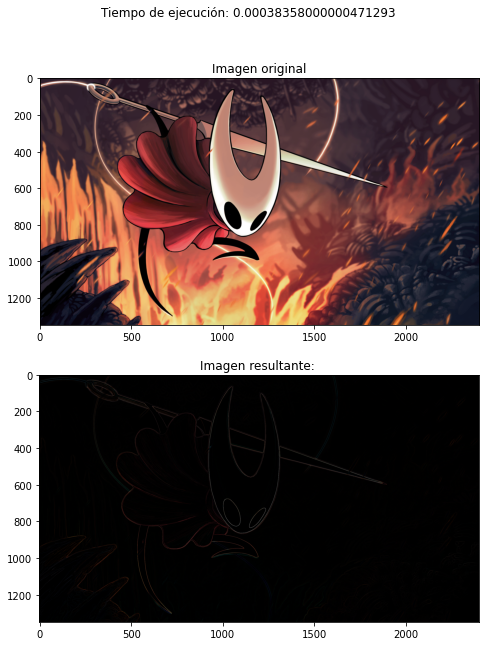

In [ ]:
if wake_up_gpu == 1:
  en_op = np.array( [0] ) # Tenemos que cargar la variable que desabilitara las operaciones como un array para poder mandarsela a la gpu
  en_op_gpu = cuda.to_device( np.int_(en_op.astype(np.uint64)) )

  start = perf_counter()
  convolution2D[blocks_per_grid_3d, threads_per_block_3d](imArr_gpu, imArr_shape_gpu, ker_gpu, ker_shape_gpu, imArr_fin_gpu, imArr_fin_shape_gpu, en_op_gpu)
  finish = perf_counter()

  imArr_fin_gpu_dev = imArr_fin_gpu.copy_to_host()
  img_fin_mod = not(imArr_fin_gpu_dev.all() == imArr_fin_zeros.all()) # Esto demuestra que no se han realizado operaciones dentro de la funcion en la gpu, ya que la matriz imArr_fin_gpu será igual a la de imArr_fin_zeros si no se ha modificado (imagen final)

  if img_fin_mod == False:
    print("La matriz de la imagen final no se ha modificado (no se han hecho operaciones).")
    print("Tiempo de ejecución: " + str(finish-start) + "\n\n")


  # La ejecucion de verdad ==============================================================================================================================================
  en_op = np.array( [1] )
  en_op_gpu = cuda.to_device( np.int_(en_op.astype(np.uint64)) )

  start = perf_counter()
  convolution2D[blocks_per_grid_3d, threads_per_block_3d](imArr_gpu, imArr_shape_gpu, ker_gpu, ker_shape_gpu, imArr_fin_gpu, imArr_fin_shape_gpu, en_op_gpu)
  finish = perf_counter()

  im_fin = imArr_fin_gpu.copy_to_host()

  fig_gpu, axes_gpu = plt.subplots(2, figsize=(12,10))
  fig_gpu.suptitle("Tiempo de ejecución: " + str(finish-start))
  axes_gpu[0,0].imshow(Image.fromarray(np.uint8(imArr), 'RGB'))
  axes_gpu[0,0].title.set_text("Imagen original: " + str(imArr.size[1]))
  axes_gpu[0,1].imshow(Image.fromarray(np.uint8(im_fin), 'RGB'))
  axes_gpu[0,1].title.set_text("Imagen resultante: " + str(im_fin.size[1]))

else:
  en_op = np.array( [1] )
  en_op_gpu = cuda.to_device( np.int_(en_op.astype(np.uint64)) )

  start = perf_counter()
  convolution2D[blocks_per_grid_3d, threads_per_block_3d](imArr_gpu, imArr_shape_gpu, ker_gpu, ker_shape_gpu, imArr_fin_gpu, imArr_fin_shape_gpu, en_op_gpu)
  finish = perf_counter()

  im_fin = imArr_fin_gpu.copy_to_host()

  fig_gpu, axes_gpu = plt.subplots(2, figsize=(12,10))
  fig_gpu.suptitle("Tiempo de ejecución: " + str(finish-start))
  axes_gpu[0].imshow(Image.fromarray(np.uint8(imArr), 'RGB'))
  axes_gpu[0].title.set_text("Imagen original")
  axes_gpu[1].imshow(Image.fromarray(np.uint8(im_fin), 'RGB'))
  axes_gpu[1].title.set_text("Imagen resultante: ")

plt.show()


#### _Resultados del Algoritmo Paralelo_

Ejecutamos el algoritmo paralelo y comprobamos los tiempos de ejecución.


Imagen 1 de 10, tamaño: [133 238   3] (ancho, alto).
	Tiempo de ejecución en gpu: 0.00024013000000877582 segundos.



Imagen 2 de 10, tamaño: [268 478   3] (ancho, alto).
	Tiempo de ejecución en gpu: 0.00023508399999627727 segundos.



Imagen 3 de 10, tamaño: [403 718   3] (ancho, alto).
	Tiempo de ejecución en gpu: 0.00018325199999935649 segundos.



Imagen 4 de 10, tamaño: [538 958   3] (ancho, alto).
	Tiempo de ejecución en gpu: 0.00019840599998133257 segundos.



Imagen 5 de 10, tamaño: [ 673 1198    3] (ancho, alto).
	Tiempo de ejecución en gpu: 0.00021883900001284928 segundos.



Imagen 6 de 10, tamaño: [ 808 1438    3] (ancho, alto).
	Tiempo de ejecución en gpu: 0.00022107799998138944 segundos.



Imagen 7 de 10, tamaño: [ 943 1678    3] (ancho, alto).
	Tiempo de ejecución en gpu: 0.0004222869999921386 segundos.



Imagen 8 de 10, tamaño: [1078 1918    3] (ancho, alto).
	Tiempo de ejecución en gpu: 0.00022062499999719876 segundos.



Imagen 9 de 10, tamaño: [1213 2158    3] (anc

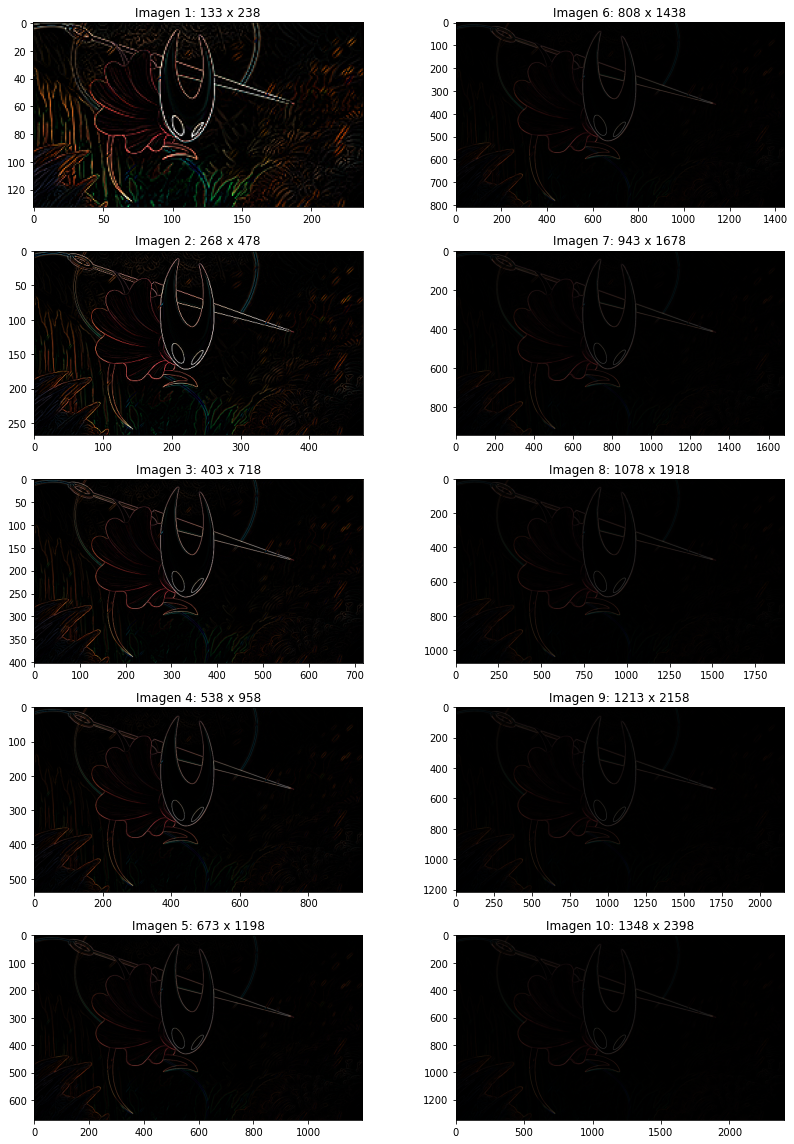

In [ ]:
len_img_list = len(img_list)
T_gpu = []

if(mostrar_imagenes_convolucion == 1):
  fig_gpu_fin, axes_gpu_fin = plt.subplots(int(np.ceil(len_img_list/2)), int(2), figsize=(12,16))

if wake_up_gpu == 1:
  en_op = np.array( [0] ) # Tenemos que cargar la variable que desabilitara las operaciones como un array para poder mandarsela a la gpu
  en_op_gpu = cuda.to_device( np.int_(en_op.astype(np.uint64)) )
  convolution2D[blocks_per_grid_3d, threads_per_block_3d](imArr_gpu, imArr_shape_gpu, ker_gpu, ker_shape_gpu, imArr_fin_gpu, imArr_fin_shape_gpu, en_op_gpu)

for i in range(len_img_list):

    # Img og, cargamos la img que toque
    imArr = np.array(img_list[i]).astype(np.float32)
    imArr_gpu = cuda.to_device(imArr.astype(np.float32))
    imArr_shape = np.array(imArr.shape)
    imArr_shape_gpu = cuda.to_device(imArr_shape.astype(np.float32))

    # Img fin, cargamos una matriz con el tamaño de la img de salida en funcion de la de la entrada
    imArr_fin_shape = np.array( [imArr.shape[0]-ker_gpu.shape[0]+1, imArr.shape[1]-ker_gpu.shape[1]+1, 3] )
    imArr_fin_shape_gpu = cuda.to_device( imArr_fin_shape.astype(np.float32) )
    imArr_fin_zeros = np.zeros(imArr_fin_shape)
    imArr_fin_gpu = cuda.to_device(imArr_fin_zeros.astype(np.float32))

    en_op = np.array( [1] )
    en_op_gpu = cuda.to_device( np.int_(en_op.astype(np.uint64)) )

    # Ejecucion
    T_gpu.append( perf_counter() )
    convolution2D[blocks_per_grid_3d, threads_per_block_3d](imArr_gpu, imArr_shape_gpu, ker_gpu, ker_shape_gpu, imArr_fin_gpu, imArr_fin_shape_gpu, en_op_gpu)
    T_gpu[i] = perf_counter() - T_gpu[i]


    im_fin = imArr_fin_gpu.copy_to_host()


    # Impresión de los Resultados
    print("Imagen " + str(i+1) + " de " + str(len_img_list) + ", tamaño: " + str(imArr_fin_shape) + " (ancho, alto).")
    print("\tTiempo de ejecución en gpu: " + str(T_gpu[i]) + " segundos.")
    print("\n\n")
    if (mostrar_imagenes_convolucion == 1): # Si en la declaración de variables de decide mostrar las imagenes según se van generando
      axes_gpu_fin[int(i%(len_img_list/2)),int(np.floor(i/(len_img_list/2)))].imshow(Image.fromarray(np.uint8(im_fin), 'RGB'))
      axes_gpu_fin[int(i%(len_img_list/2)),int(np.floor(i/(len_img_list/2)))].title.set_text("Imagen "+ str(i+1) + ": " + str(imArr_fin_shape[0]) + " x " + str(imArr_fin_shape[1]))

if(mostrar_imagenes_convolucion == 1):
  fig_gpu_fin.tight_layout()
  plt.show()


#### _Diagrama de Tiempos de Ejecución_

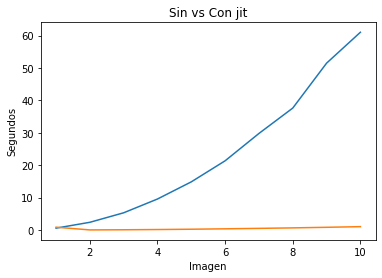

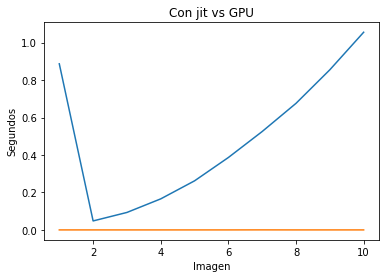

In [ ]:
# Diagrama de lineas

x = list( range(1, numero_de_imagenes_a_generar+1) )

plt.plot(x, T_sin_jit)
plt.plot(x, T_con_jit)

plt.xlabel("Imagen")
plt.ylabel("Segundos")
plt.title('Sin vs Con jit')
plt.show()


plt.plot(x, T_con_jit)
plt.plot(x, T_gpu)

plt.xlabel("Imagen")
plt.ylabel("Segundos")
plt.title('Con jit vs GPU')
plt.show()



# Referencias
- https://www.analyticssteps.com/blogs/how-does-basic-convolution-work-image-processing
- https://www.kaggle.com/general/171197
- https://iq.opengenus.org/convolution-filters/#:~:text=Convolution%20filters%20are%20filters%20
- https://medium.com/theleanprogrammer/2-dimensional-convolution-189abb174d92

<!--
# Mas rapido con float32 que con float16

# Esto:
#        for x in range(T_kernel[0]):
#          temp += imagen[i+x, j, k]*kernel[x,0] + imagen[i+x, j+1, k]*kernel[x,1] + imagen[i+x, j+2, k]*kernel[x,2] # Cuda tiene obtimizaciones para cadenas operaciones
# Es mas rapido que esto:
#        for x in range(T_kernel[0]):
#          for y in range(T_kernel[1]):
#            temp += imagen[i+x, j+y, k]*kernel[x,y]

# Fastmath for cuda: nada
-->